In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [2]:
# -------------------------------
# 1) Create synthetic data
# -------------------------------
# normal cluster
X_normal, _ = make_blobs(
    n_samples=100,
    centers=[[0, 0]],
    cluster_std=0.5,
    random_state=42,
)

# anomalies far from the cluster
np.random.seed(42)
X_anomaly = np.random.uniform(low=-6, high=6, size=(10, 2))

# combine
X = np.vstack([X_normal, X_anomaly])
y_true = np.hstack([np.zeros(len(X_normal)), np.ones(len(X_anomaly))]) # Not required for PCA

In [3]:
X_normal


array([[ 0.23661881, -0.03641446],
       [-0.41960876, -0.15460619],
       [-0.95938561, -0.01325694],
       [-0.23958712, -0.09282949],
       [-0.48734084,  0.3935423 ],
       [ 0.41127246, -0.61042182],
       [ 0.1287752 , -0.03722296],
       [-0.34001236,  0.11612685],
       [ 0.73282438, -0.11288815],
       [-0.45401204, -0.70615185],
       [-0.11707669, -0.11706848],
       [ 0.1383454 ,  0.41359162],
       [-0.35102655, -0.16383107],
       [-0.44192872,  0.07686255],
       [-0.12269406, -0.37686808],
       [ 0.48168806,  0.20639046],
       [-0.338461  ,  0.30583814],
       [ 0.40675861, -0.61543216],
       [-0.44475721, -0.40790514],
       [-0.08064286,  0.20202543],
       [-0.10983594,  0.17855629],
       [-0.45971212,  0.7749672 ],
       [ 0.02910436, -0.57148515],
       [-0.49526816, -0.28314886],
       [ 0.41103008,  0.94839649],
       [ 0.24835708, -0.06913215],
       [ 0.04853877,  0.4843225 ],
       [ 0.0337641 , -0.71237409],
       [-0.22325748,

In [4]:

print (X_anomaly)


[[-1.50551857  5.40857168]
 [ 2.7839273   1.18390181]
 [-4.12777631 -4.12806576]
 [-5.30299665  4.39411375]
 [ 1.21338014  2.49687093]
 [-5.75298607  5.63891823]
 [ 3.98931169 -3.45193067]
 [-3.81810039 -3.79914588]
 [-2.34909308  0.29707718]
 [-0.81665978 -2.50525032]]


In [5]:
print (X)

[[ 2.36618812e-01 -3.64144563e-02]
 [-4.19608762e-01 -1.54606188e-01]
 [-9.59385608e-01 -1.32569377e-02]
 [-2.39587119e-01 -9.28294883e-02]
 [-4.87340835e-01  3.93542302e-01]
 [ 4.11272456e-01 -6.10421825e-01]
 [ 1.28775195e-01 -3.72229579e-02]
 [-3.40012361e-01  1.16126849e-01]
 [ 7.32824384e-01 -1.12888150e-01]
 [-4.54012038e-01 -7.06151851e-01]
 [-1.17076687e-01 -1.17068478e-01]
 [ 1.38345400e-01  4.13591625e-01]
 [-3.51026547e-01 -1.63831073e-01]
 [-4.41928718e-01  7.68625530e-02]
 [-1.22694058e-01 -3.76868082e-01]
 [ 4.81688065e-01  2.06390463e-01]
 [-3.38461000e-01  3.05838144e-01]
 [ 4.06758609e-01 -6.15432158e-01]
 [-4.44757215e-01 -4.07905142e-01]
 [-8.06428558e-02  2.02025428e-01]
 [-1.09835944e-01  1.78556286e-01]
 [-4.59712117e-01  7.74967203e-01]
 [ 2.91043592e-02 -5.71485149e-01]
 [-4.95268163e-01 -2.83148865e-01]
 [ 4.11030080e-01  9.48396491e-01]
 [ 2.48357077e-01 -6.91321506e-02]
 [ 4.85387747e-02  4.84322495e-01]
 [ 3.37641023e-02 -7.12374093e-01]
 [-2.23257476e-01  4

In [6]:

print (y_true)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
# -------------------------------
# 2) Standardize
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 3) Fit PCA
# -------------------------------
pca = PCA(n_components=1)
pca.fit(X_scaled)

# -------------------------------
# 4) Reconstruction & error
# -------------------------------
# projection into PC space
X_proj = pca.transform(X_scaled)

X_proj

array([[ 3.29472821e-01],
       [-1.19212251e-02],
       [-4.31741568e-01],
       [ 6.46291210e-02],
       [-3.73661099e-01],
       [ 7.73125627e-01],
       [ 2.62521982e-01],
       [-1.19909583e-01],
       [ 6.84251502e-01],
       [ 2.87944884e-01],
       [ 1.55344059e-01],
       [ 5.82462238e-03],
       [ 3.63303249e-02],
       [-1.60747395e-01],
       [ 3.03212120e-01],
       [ 3.41208331e-01],
       [-2.29480611e-01],
       [ 7.73223068e-01],
       [ 1.19948550e-01],
       [-7.80767479e-03],
       [-1.23836893e-02],
       [-5.78636637e-01],
       [ 5.11513231e-01],
       [ 1.56770472e-02],
       [-1.35317614e-01],
       [ 3.55875313e-01],
       [-9.15343426e-02],
       [ 5.96519541e-01],
       [-2.28754802e-01],
       [-9.21287857e-02],
       [-3.09718226e-01],
       [ 3.41236698e-01],
       [-1.54553902e-01],
       [ 6.05627185e-01],
       [ 2.11287347e-01],
       [-8.98037335e-01],
       [ 1.02201469e-01],
       [ 7.96543808e-01],
       [-1.4

In [8]:
# reconstruct from PCs
X_recon = pca.inverse_transform(X_proj)


X_recon

array([[ 2.32972466e-01, -2.32972466e-01],
       [-8.42957911e-03,  8.42957911e-03],
       [-3.05287391e-01,  3.05287391e-01],
       [ 4.56996897e-02, -4.56996897e-02],
       [-2.64218297e-01,  2.64218297e-01],
       [ 5.46682374e-01, -5.46682374e-01],
       [ 1.85631074e-01, -1.85631074e-01],
       [-8.47888794e-02,  8.47888794e-02],
       [ 4.83838877e-01, -4.83838877e-01],
       [ 2.03607780e-01, -2.03607780e-01],
       [ 1.09844838e-01, -1.09844838e-01],
       [ 4.11862998e-03, -4.11862998e-03],
       [ 2.56894191e-02, -2.56894191e-02],
       [-1.13665573e-01,  1.13665573e-01],
       [ 2.14403346e-01, -2.14403346e-01],
       [ 2.41270725e-01, -2.41270725e-01],
       [-1.62267296e-01,  1.62267296e-01],
       [ 5.46751275e-01, -5.46751275e-01],
       [ 8.48164328e-02, -8.48164328e-02],
       [-5.52085979e-03,  5.52085979e-03],
       [-8.75659069e-03,  8.75659069e-03],
       [-4.09157890e-01,  4.09157890e-01],
       [ 3.61694474e-01, -3.61694474e-01],
       [ 1.

In [9]:
# reconstruction error per sample
recon_error = np.mean((X_scaled - X_recon)**2, axis=1)

recon_error

array([2.21289392e-02, 3.61144408e-02, 1.37210456e-01, 7.22545252e-03,
       3.44097496e-05, 1.10952179e-04, 1.01506358e-02, 1.87525519e-03,
       1.13304621e-01, 1.87049955e-01, 1.66719121e-03, 8.45205734e-02,
       2.67389913e-02, 1.09277762e-02, 2.26070205e-02, 1.27545856e-01,
       1.26350549e-03, 2.12960466e-04, 9.33417380e-02, 1.13949449e-02,
       7.08492848e-03, 3.07066995e-02, 2.67113782e-02, 7.64226896e-02,
       3.98942178e-01, 1.97309485e-02, 7.84927871e-02, 4.81472541e-02,
       1.87385475e-02, 1.73006495e-01, 6.09704846e-03, 6.64039481e-02,
       6.24892436e-02, 4.35644038e-04, 2.29343256e-01, 1.22905251e-01,
       3.12641853e-02, 8.90324737e-02, 1.43427424e-01, 1.26330977e-02,
       5.39348888e-04, 1.08909470e-01, 3.83580313e-05, 1.11122551e-01,
       7.70975420e-02, 2.13692600e-02, 3.58234675e-02, 3.20717176e-01,
       2.46038024e-02, 4.51054069e-03, 2.17750256e-03, 1.08386353e-01,
       3.23959968e-01, 2.25453892e-02, 1.39554514e-01, 1.93673461e-01,
      

In [10]:
# threshold for anomaly
#Find the value below which 90% of reconstruction errors fall
threshold = np.percentile(recon_error, 90)
threshold


np.float64(0.3210414549236496)

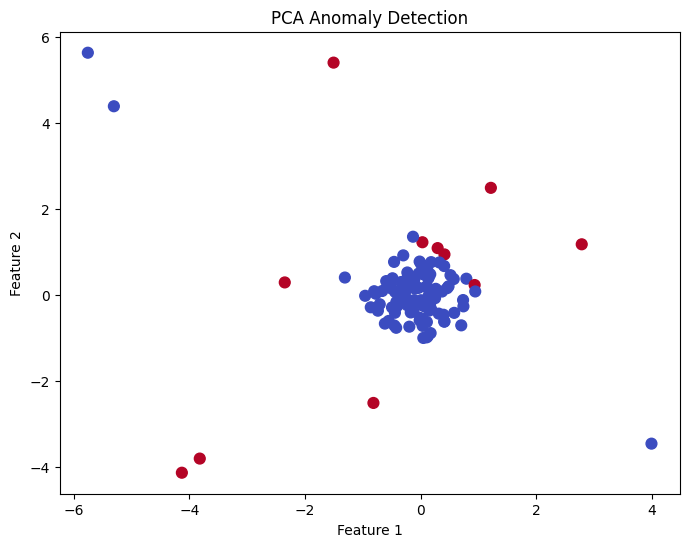

Threshold   = 0.321
Detected anomalies (pred) = 11
True anomalies             = 10.0


In [11]:
# predicted anomaly label
y_pred = (recon_error > threshold).astype(int)

# -------------------------------
# 5) Plot results
# -------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="coolwarm", s=60)
plt.title("PCA Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# print summary
print(f"Threshold   = {threshold:.3f}")
print(f"Detected anomalies (pred) = {np.sum(y_pred)}")
print(f"True anomalies             = {np.sum(y_true)}")